<a href="https://colab.research.google.com/github/Bilal-programmer/Mini-Project/blob/master/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Preprocessing 
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread             # Used for image reading
from skimage.transform import resize      # Used for resizing

target = []
images = []
flat_data = []

Data_dir = "/content/images"
Categories = ['Banana', 'Grapes']

for category in Categories:
  item_num = Categories.index(category) # Label categories in numeric
  path = os.path.join(Data_dir,category) # Create path to use all the images
  # print(path)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    # print(img_array.shape)
    # plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3)) # Data will be normalize to 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(item_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


In [15]:
flat_data

array([[0.13418301, 0.40297386, 0.43009804, ..., 0.28062092, 0.33045752,
        0.14284314],
       [0.62420588, 0.63836275, 0.65203922, ..., 0.77352941, 0.79493137,
        0.81666667],
       [0.22640523, 0.16926797, 0.06237908, ..., 0.63265359, 0.60057516,
        0.56304575],
       ...,
       [0.4627451 , 0.55294118, 0.23137255, ..., 0.96862745, 0.91764706,
        0.88627451],
       [0.23529412, 0.30588235, 0.4627451 , ..., 0.57647059, 0.48235294,
        0.60784314],
       [0.28991176, 0.3605    , 0.20620588, ..., 0.719     , 0.58272549,
        0.45429412]])

In [16]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

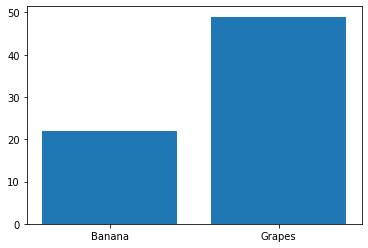

In [20]:
unique, count = np.unique(target, return_counts=True)
plt.bar(Categories,count)

In [24]:
# Splitting the data Training and testing 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.2, random_state = 98) 

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = [
              {'C':[1, 10, 100, 1000],'kernel':['linear']},
              {'C':[1, 10, 100, 1000],'gamma':[0.001, 0.0001],'kernel':['rbf']},
]

model = SVC(probability=True)
grid_model = GridSearchCV(model,param_grid)
grid_model.fit(x_train,y_train)
grid_model.best_params_


{'C': 1, 'kernel': 'linear'}

In [42]:
y_pred = grid_model.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [43]:
y_test

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [34]:
accuracy_score(y_pred, y_test)

1.0

In [36]:
confusion_matrix(y_pred, y_test)

array([[ 4,  0],
       [ 0, 11]])

In [44]:
import joblib
joblib.dump(grid_model,'Image_classification_model')

['Image_classification_model']

In [45]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 5.7MB/s 
     |████████████████████████████████| 163kB 55.3MB/s 
     |████████████████████████████████| 112kB 56.3MB/s 
     |████████████████████████████████| 81kB 7.1MB/s 
     |████████████████████████████████| 4.2MB 49.7MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 122kB 55.1MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.


In [55]:
%%writefile app.py
import streamlit as st
import joblib
import sklearn
import numpy as np
from PIL import Image
from skimage.io import imread             
from skimage.transform import resize      


model = joblib.load('/content/Image_classification_model')
st.title('Image Classifier')
st.text("Upload the image")
uploaded_file = st.file_uploader("Choose an image...", type="jpg")

if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('Predict'):
    st.write('Result...')

    flat_data = []
    Categories = ['Banana', 'Grapes']

    img = np.array(img)
    img_resized = resize(img,(150,150,3)) # Data will be normalize to 0 to 1
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    
    pred = model.predict(flat_data)
    pred = Categories[pred[0]]
    st.write("Predicted Output: " + pred)

Overwriting app.py


In [47]:
!nohup streamlit run app.py &
url=ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://59fd83055405.ngrok.io'

In [56]:
!pip install pipreqs
!pipreqs /content

INFO: Successfully saved requirements file in /content/requirements.txt


In [57]:
import sys
sys.version

'3.7.10 (default, Feb 20 2021, 21:17:23) \n[GCC 7.5.0]'